In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
from torch.utils.data import TensorDataset, DataLoader

%matplotlib inline
import time
import pylab as pl
from IPython import display

import seaborn as sns
from matplotlib.colors import BoundaryNorm, ListedColormap
pd.options.display.float_format = "{:,.3f}".format

from IPython.display import clear_output

In [2]:
# Check if CUDA is available and set PyTorch to use the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
# import numpy as np
# from sklearn.utils import shuffle

# import torch
# import torch.nn as nn
# import torch.optim as optim

# ##### Agent Environment
# class Bandit_multi:
#     def __init__(self, X, y, is_shuffle=True, seed=None):
#         # No need to fetch data, use provided arrays
#         self.X = X
#         self.y = y
    
#         # Shuffle data if needed
#         if is_shuffle:
#             self.X, self.y = shuffle(X, y, random_state=seed)
    
#         # Cursor and other variables
#         self.cursor = 0
#         self.size = self.y.shape[0]
#         self.n_arm = self.y.shape[1]  # Number of arms based on one-hot encoding shape
#         self.dim = self.X.shape[1] * self.n_arm
#         self.act_dim = self.X.shape[1]
    
#     def step(self):
#         assert self.cursor < self.size
#         X = np.zeros((self.n_arm, self.dim))
#         for a in range(self.n_arm):
#             X[a, a * self.act_dim:a * self.act_dim + self.act_dim] = self.X[self.cursor]
#         arm = np.argmax(self.y[self.cursor])  # Get index of the active arm
#         rwd = self.y[self.cursor].copy()  # Reward based on one-hot encoded response
#         self.cursor += 1
#         return X, rwd
    
#     def finish(self):
#         return self.cursor == self.size
    
#     def reset(self):
#         self.cursor = 0

# ##### Neural UCB agent
# class Network(nn.Module):
#     def __init__(self, dim, hidden_size=50000):
#         super(Network, self).__init__()
#         self.fc1 = nn.Linear(dim, hidden_size)
#         self.activate = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, 1)
    
#     def forward(self, x):
#         return self.fc2(self.activate(self.fc1(x)))


# class NeuralUCBDiag:
#     def __init__(self, dim, lamdba=1, nu=1, hidden=50000, device="cuda" if torch.cuda.is_available() else "cpu"):
#         self.func = Network(dim, hidden_size=hidden).to(device)
#         self.context_list = []
#         self.reward = []
#         self.lamdba = lamdba
#         self.total_param = sum(p.numel() for p in self.func.parameters() if p.requires_grad)
#         self.U = lamdba * torch.ones((self.total_param,), device=device)
#         self.nu = nu
#         self.device = device
    
#     def select(self, context):
#         # tensor = torch.from_numpy(context).float().to(self.device)
#         # mu = self.func(tensor)
#         mu = self.func(context)
#         g_list = []
#         sampled = []
#         ave_sigma = 0
#         ave_rew = 0
        
#         for fx in mu:
#             self.func.zero_grad()
#             fx.backward(retain_graph=True)
#             g = torch.cat([p.grad.flatten().detach() for p in self.func.parameters()])
#             g_list.append(g)
            
#             sigma2 = self.lamdba * self.nu * g * g / self.U
#             sigma = torch.sqrt(torch.sum(sigma2))
            
#             sample_r = fx.item() + sigma.item()
#             sampled.append(sample_r)
#             ave_sigma += sigma.item()
#             ave_rew += sample_r
    
#         arm = np.argmax(sampled)
#         self.U += g_list[arm] * g_list[arm]
#         return arm, g_list[arm].norm().item(), ave_sigma, ave_rew

#     def train(self, context, reward):
#         self.context_list.append(context.to(self.device))  
#         #self.context_list.append(torch.from_numpy(context.reshape(1, -1)).float().to(self.device))
#         self.reward.append(reward)
#         optimizer = optim.SGD(self.func.parameters(), lr=1e-2, weight_decay=self.lamdba)
#         length = len(self.reward)
#         index = np.arange(length)
#         np.random.shuffle(index)
#         cnt = 0
#         tot_loss = 0

#         while True:
#             batch_loss = 0
#             for idx in index:
#                 c = self.context_list[idx]
#                 r = self.reward[idx]
#                 optimizer.zero_grad()
#                 delta = self.func(c.to(self.device)) - r
#                 loss = delta * delta
#                 loss.backward()
#                 optimizer.step()
#                 batch_loss += loss.item()
#                 tot_loss += loss.item()
#                 cnt += 1
#                 if cnt >= 1000:
#                     return tot_loss / 1000
#                 if batch_loss / length <= 1e-3:
#                     return batch_loss / length

# def run_evaluation(agent, test_trials, test_answers):
#     test_environment = Bandit_multi(test_trials, test_answers, is_shuffle=False)
#     selected_arm_list = []
#     reward_selection_list = []
#     agent_response_list = []
    
#     # with torch.no_grad():
#     for t in range(test_environment.size): # All trials must pass
#         # Get context and reward from Bandit environment
#         context, rwd = test_environment.step()
#         context = torch.from_numpy(context).float().to(device)  # Move context to device
        
#         # Select arm, norm, sigma, and average reward
#         arm_select, _, _, _ = agent.select(context)
#         # arm_select
#         action_reward = rwd[arm_select]
        
#         # Create one-hot encoded vector for the selected arm
#         arm_one_hot = np.zeros(test_environment.n_arm)
#         arm_one_hot[arm_select] = 1
#         agent_response = arm_one_hot
    
#         selected_arm_list.append(arm_select)
#         reward_selection_list.append(action_reward)
#         agent_response_list.append(agent_response)
            
#     return selected_arm_list, reward_selection_list#, np.array(agent_response_list)

In [4]:
rng = np.random.default_rng()

In [5]:
%run ../utils/trials_v03.py 

In [6]:
%run experiment.py 

Using device: cuda


In [7]:
members_number = 5
classes_number = 4

members_stim, class_stim, stimuli_set, dummy_set = get_stimuli_list(members_n = members_number, classes_n = classes_number)

In [8]:
protocols_dict = {f"{ts}_{relation}": {'train_structure': ts, 'relation_type': relation} 
                  for ts in ["LS", "OTM", "MTO"] for relation in ['select_only', 'select_reject']}
list(protocols_dict.keys())

['LS_select_only',
 'LS_select_reject',
 'OTM_select_only',
 'OTM_select_reject',
 'MTO_select_only',
 'MTO_select_reject']

In [9]:
protocol_names=list(protocols_dict.keys())
prt_nm = 0
print(protocol_names[prt_nm])
protocol = protocols_dict[protocol_names[prt_nm]]
member_pairs_df = create_pair_members(members_stim, train_structure = protocol["train_structure"])
experimental_pairs = create_pairs_classes(member_pairs_df, class_stim)

LS_select_only


In [10]:
baseline_train_trials_info = create_trials(
    subset_to_trials = "baseline", 
    pairs_dataset_df = experimental_pairs, 
    stimuli_list = stimuli_set, 
    dummy_list = dummy_set, 
    relation_type = protocol['relation_type'])

reflexivity_trials_info = create_trials(
    subset_to_trials = "reflexivity", 
    pairs_dataset_df = experimental_pairs, 
    stimuli_list = stimuli_set, 
    dummy_list = dummy_set, 
    relation_type = "select_reject")

symmetry_trials_info = create_trials(
    subset_to_trials = "symmetry", 
    pairs_dataset_df = experimental_pairs, 
    stimuli_list = stimuli_set, 
    dummy_list = dummy_set, 
    relation_type = "select_reject")

transitivity_trials_info = create_trials(
    subset_to_trials = "transitivity", 
    pairs_dataset_df = experimental_pairs, 
    stimuli_list = stimuli_set, 
    dummy_list = dummy_set, 
    relation_type = "select_reject")

In [11]:
# This encoding can be used in a loop for validate stability across several experiments avoiding learning related to feature encoding positioning. 
stimuli_dict_encoded = encode_stims (stimuli_set, dummy_set)

In [12]:
baseline_train_trials, baseline_train_answers = process_trial_values(baseline_train_trials_info, stimuli_dict_encoded)
reflexivity_trials, reflexivity_answers = process_trial_values(reflexivity_trials_info, stimuli_dict_encoded)
symmetry_trials, symmetry_answers = process_trial_values(symmetry_trials_info, stimuli_dict_encoded)
transitivity_trials, transitivity_answers = process_trial_values(transitivity_trials_info, stimuli_dict_encoded)

In [13]:
print (baseline_train_trials.shape)

(1512, 80)


In [14]:
# Define training parameters
args = {
    'shuffle': True,  
    'seed': 0,  # Random seed (0 for None)
    'nu': 1,  # Control variance parameter
    'lamdba': 0.001,  # Regularization parameter
    'hidden': 50000,  # Network hidden size
}

# Create Bandit environment
b = Bandit_multi(baseline_train_trials, baseline_train_answers)

# Create NeuralUCB agent on device
bandit_info = 'user_data'  # Information about your data
ucb_info = '_{:.3e}_{:.3e}_{}'.format(args['lamdba'], args['nu'], args['hidden'])
agent = NeuralUCBDiag(b.dim, args['lamdba'], args['nu'], args['hidden'])#.to(device)

# Training loop
regrets = []
summ = 0

1500: 74.000, 2.245e-07, 9.739e+00, 3.992e+00, 5.014e+00


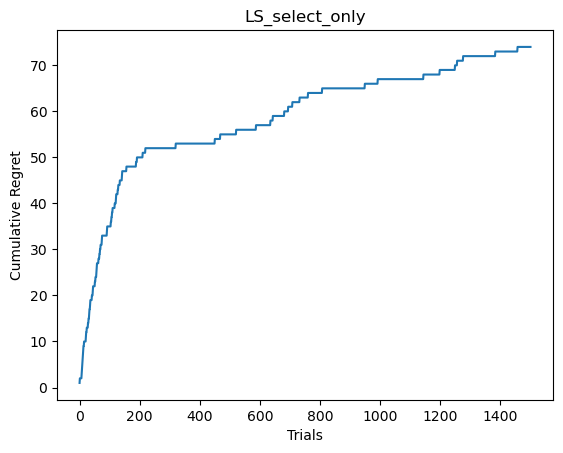

Training complete!


In [15]:
for t in range(b.size): # All trials must pass
  # Get context and reward from Bandit environment
  context, rwd = b.step()
  context = torch.from_numpy(context).float().to(device)  # Move context to device

  # Select arm, norm, sigma, and average reward
  arm_select, nrm, sig, ave_rwd = agent.select(context)

  # Get actual reward and calculate regret
  r = rwd[arm_select]
  reg = np.max(rwd) - r
  summ += reg

  # Train agent
  loss = agent.train(context[arm_select], r)

  # Track regrets and print progress
  regrets.append(summ)
  if t % 100 == 0:
      clear_output(wait=True)
      print('{}: {:.3f}, {:.3e}, {:.3e}, {:.3e}, {:.3e}'.format(t, summ, loss, nrm, sig, ave_rwd))
      plt.plot(range(len(regrets)), regrets)
      plt.title (protocol_names[prt_nm])
      plt.xlabel("Trials")
      plt.ylabel("Cumulative Regret")
      plt.show()
      

## Save regrets (path includes bandit and agent info with timestamp)
path = "salidas/"+protocol_names[prt_nm]+"regrets"# '{}_{}'.format(bandit_info, ucb_info, protocol_names[prt_nm])
with open(path, 'w') as fr:
  for i in regrets:
    fr.write(str(i) + "\n")

print("Training complete!")

In [16]:
baseline_response, baseline_reward = run_evaluation(agent, baseline_train_trials, baseline_train_answers)
reflexivity_response, reflexivity_reward = run_evaluation(agent, reflexivity_trials, reflexivity_answers)
transitivity_response, transitivity_reward = run_evaluation(agent, transitivity_trials, transitivity_answers)
symmetry_response, symmetry_reward = run_evaluation(agent, symmetry_trials, symmetry_answers)

In [17]:
print(np.mean(baseline_reward),
      np.mean(reflexivity_reward), 
      np.mean(transitivity_reward),
      np.mean(symmetry_reward))

0.9808201058201058 0.38938492063492064 0.27744708994708994 0.30423280423280424


In [18]:
# Add evaluation to experiment info to plot results.

In [19]:
baseline_train_trials_info["agent_response"] = baseline_response
baseline_train_trials_info["response_score"] = baseline_reward

reflexivity_trials_info["agent_response"] = reflexivity_response
reflexivity_trials_info["response_score"] = reflexivity_reward

symmetry_trials_info["agent_response"] = symmetry_response
symmetry_trials_info["response_score"] = symmetry_reward

transitivity_trials_info["agent_response"] = transitivity_response
transitivity_trials_info["response_score"] = transitivity_reward

In [20]:
protocol_output = pd.concat([
    baseline_train_trials_info,
    reflexivity_trials_info,
    symmetry_trials_info,
    transitivity_trials_info],
    axis=0, 
    ignore_index=True)

protocol_output['agent_response']=["O_"+str(arm+1) for arm in protocol_output['agent_response']]
protocol_output['sample_member']=[stim[0] for stim in protocol_output.st_sample]
protocol_output['comparison_member']=[stim[0] for stim in protocol_output.st_comparison]

In [ ]:
# protocol_output.to_pickle("salidas/"+protocol_names[prt_nm]+".pkl")